In [1]:
import numpy as np 
import pandas as pd

### Import Dataset

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
# Check for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Explore the distribution of salaries

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


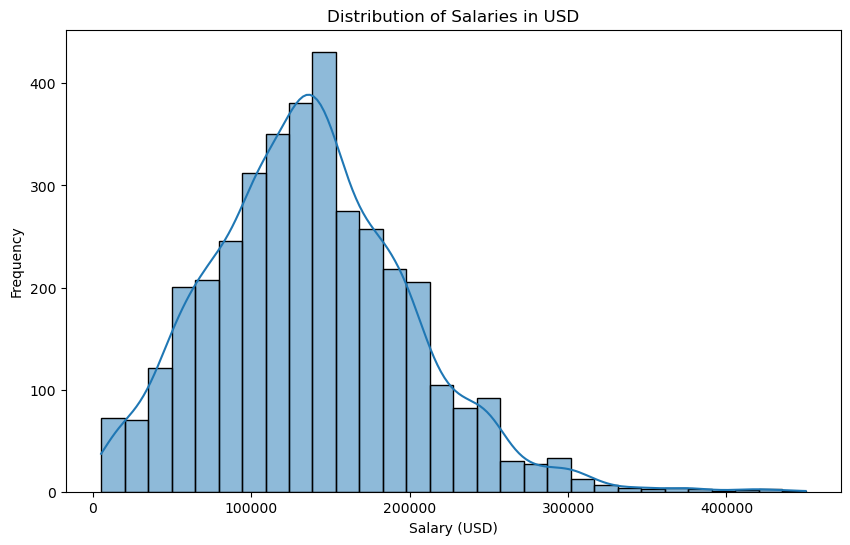

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Display summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)

# Explore the distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

The histogram will give us insights into the overall salary distribution in the dataset.

### Explore the impact of experience levels on salaries

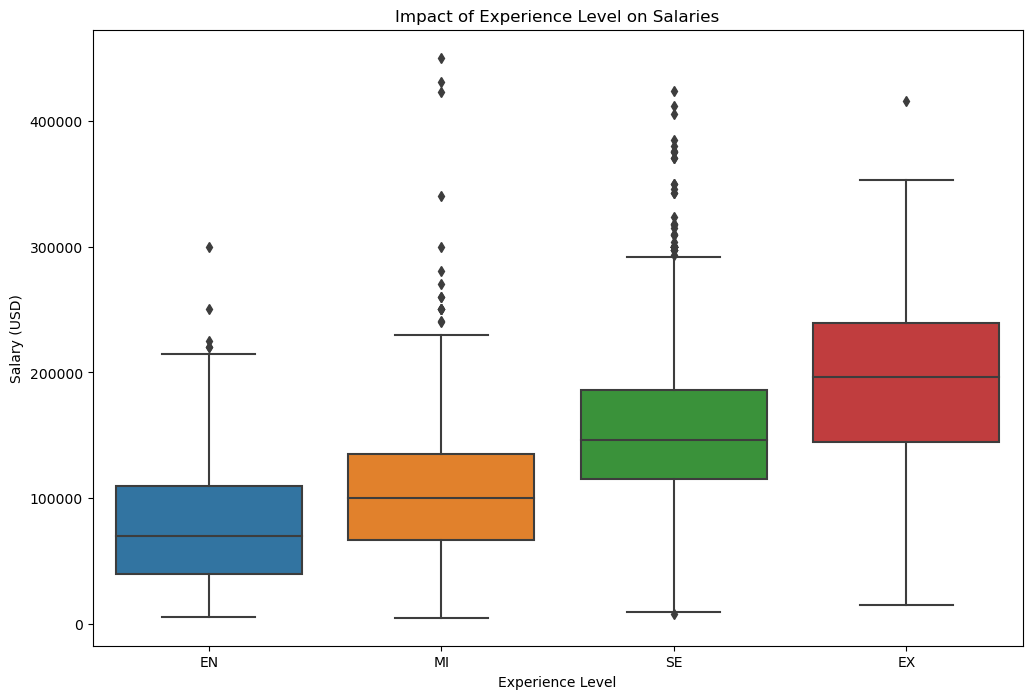

In [9]:
# Explore the impact of experience levels on salaries
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Impact of Experience Level on Salaries')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()


This code generates a boxplot that visualizes the distribution of salaries for different experience levels (EN: Entry-level, MI: Mid-level, SE: Senior-level, EX: Executive-level). The boxplot provides insights into the central tendency, spread, and potential outliers for each experience level.

### Explore the impact of employment types on salaries

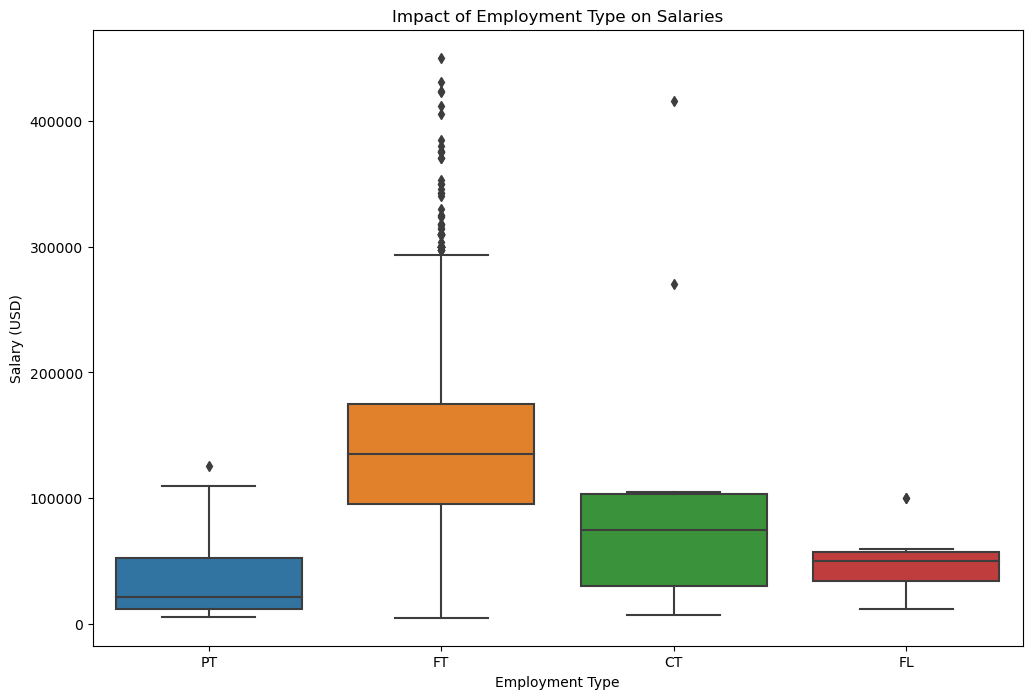

In [10]:
# Explore the impact of employment types on salaries
plt.figure(figsize=(12, 8))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, order=['PT', 'FT', 'CT', 'FL'])
plt.title('Impact of Employment Type on Salaries')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.show()


This code generates a boxplot that visualizes the distribution of salaries for different employment types (PT: Part-time, FT: Full-time, CT: Contract, FL: Freelance). The boxplot helps in comparing the central tendency, spread, and potential outliers for each employment type.

### Identify the top 10 or 20 job titles with the highest median salary

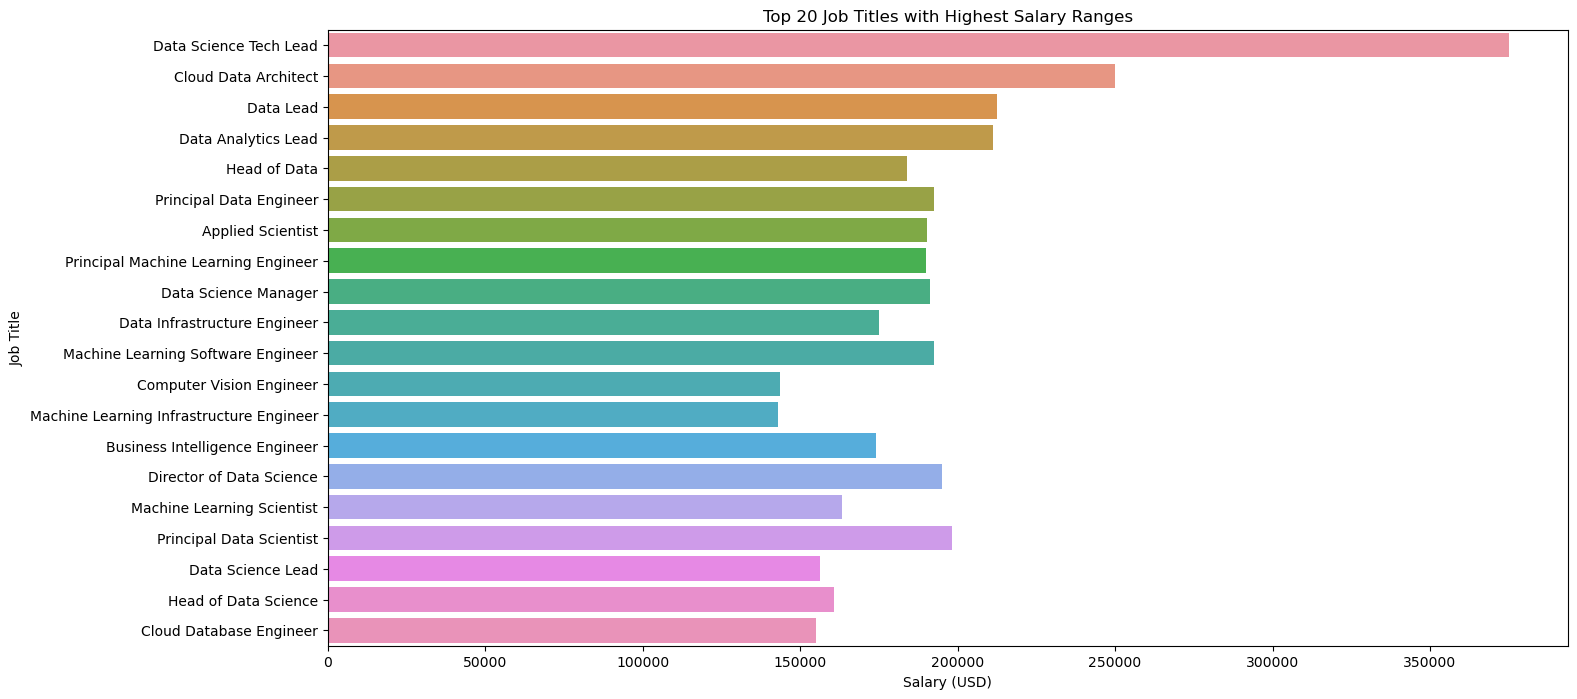

In [11]:
# Identify the top 10 or 20 job titles with the highest median salary
top_job_titles = df.groupby('job_title')['salary_in_usd'].median().nlargest(20).index

# Filter the dataset for the top job titles
df_top_jobs = df[df['job_title'].isin(top_job_titles)]

# Create a bar chart to show the highest-paying job titles and their distribution
plt.figure(figsize=(16, 8))
sns.barplot(x='salary_in_usd', y='job_title', data=df_top_jobs, errorbar=None, order=top_job_titles)
plt.title('Top 20 Job Titles with Highest Salary Ranges')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.show()

### Identify the top 10 or 20 job titles with the highest median salary

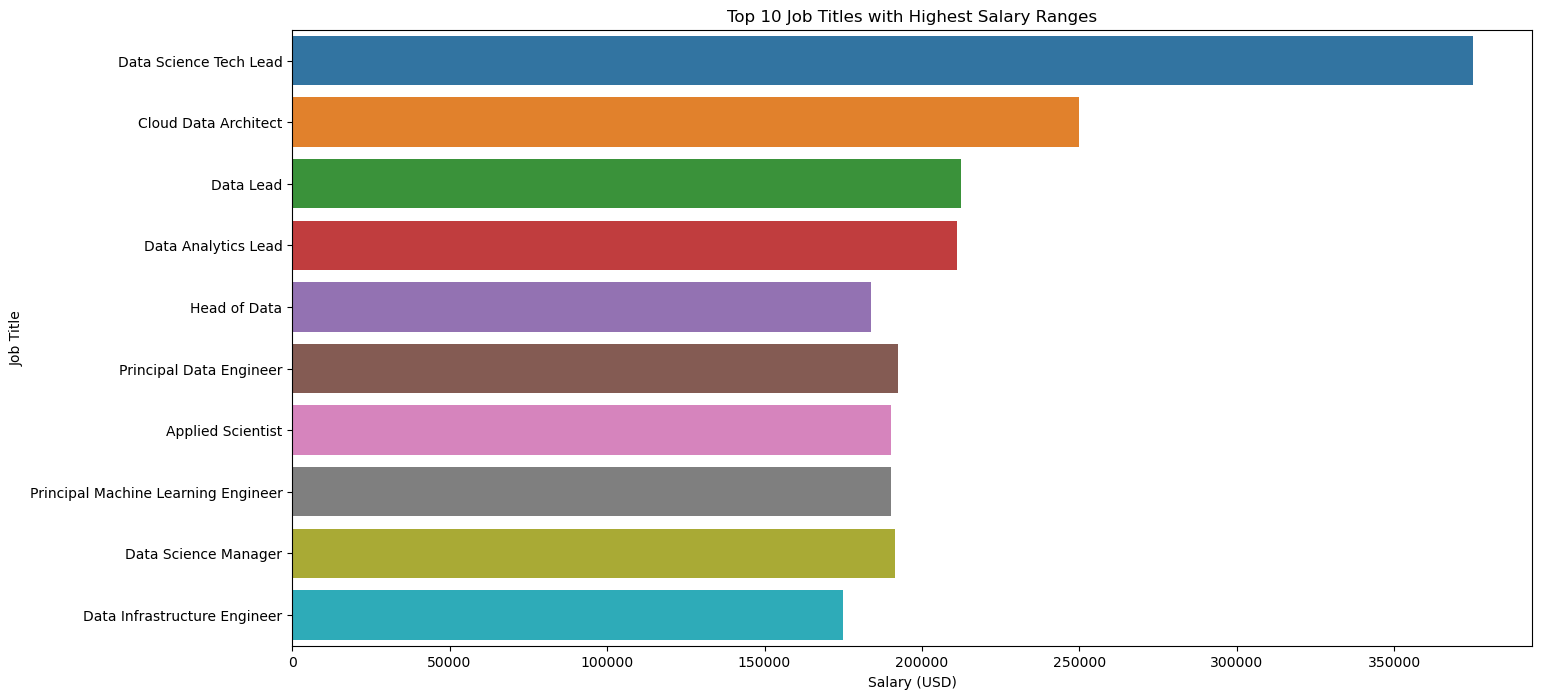

In [12]:
# Identify the top 10 or 20 job titles with the highest median salary
top_job_titles = df.groupby('job_title')['salary_in_usd'].median().nlargest(10).index

# Filter the dataset for the top job titles
df_top_jobs = df[df['job_title'].isin(top_job_titles)]

# Create a bar chart to show the highest-paying job titles and their distribution
plt.figure(figsize=(16, 8))
sns.barplot(x='salary_in_usd', y='job_title', data=df_top_jobs, errorbar=None, order=top_job_titles)
plt.title('Top 10 Job Titles with Highest Salary Ranges')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.show()

This code identifies the top 20 job titles with the highest median salary and creates a horizontal bar chart to visualize their salary distributions. The y-axis represents job titles, and the x-axis shows the salary in USD.

### Explore the impact of remote work on salaries

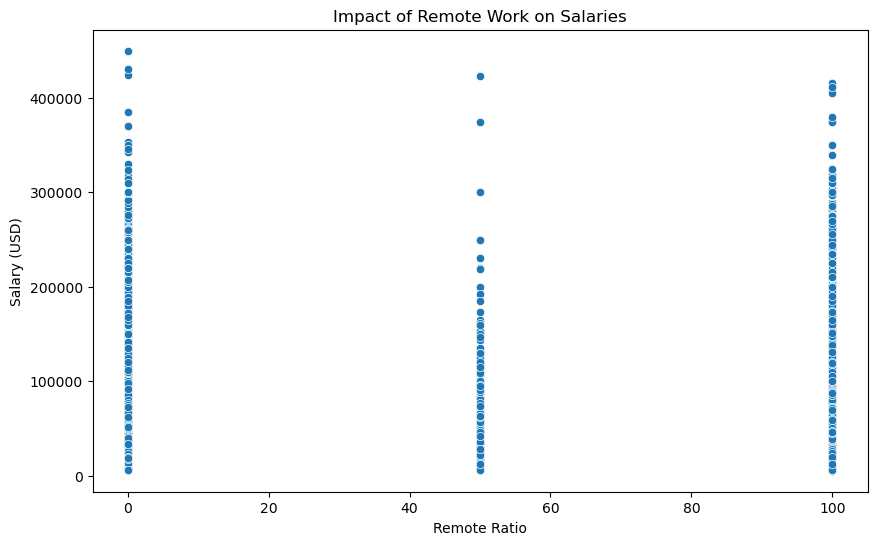

Correlation between Remote Work Ratio and Salary: -0.06


In [13]:
# Explore the impact of remote work on salaries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Impact of Remote Work on Salaries')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary (USD)')
plt.show()

# Calculate the correlation between remote work ratio and salary
correlation = df['remote_ratio'].corr(df['salary_in_usd'])
print(f"Correlation between Remote Work Ratio and Salary: {correlation:.2f}")


The scatter plot will visualize the relationship between the remote work ratio and salaries, helping us identify any potential patterns. Additionally, the correlation coefficient will provide a quantitative measure of the strength and direction of the linear relationship between these two variables.

### Explore the impact of company size

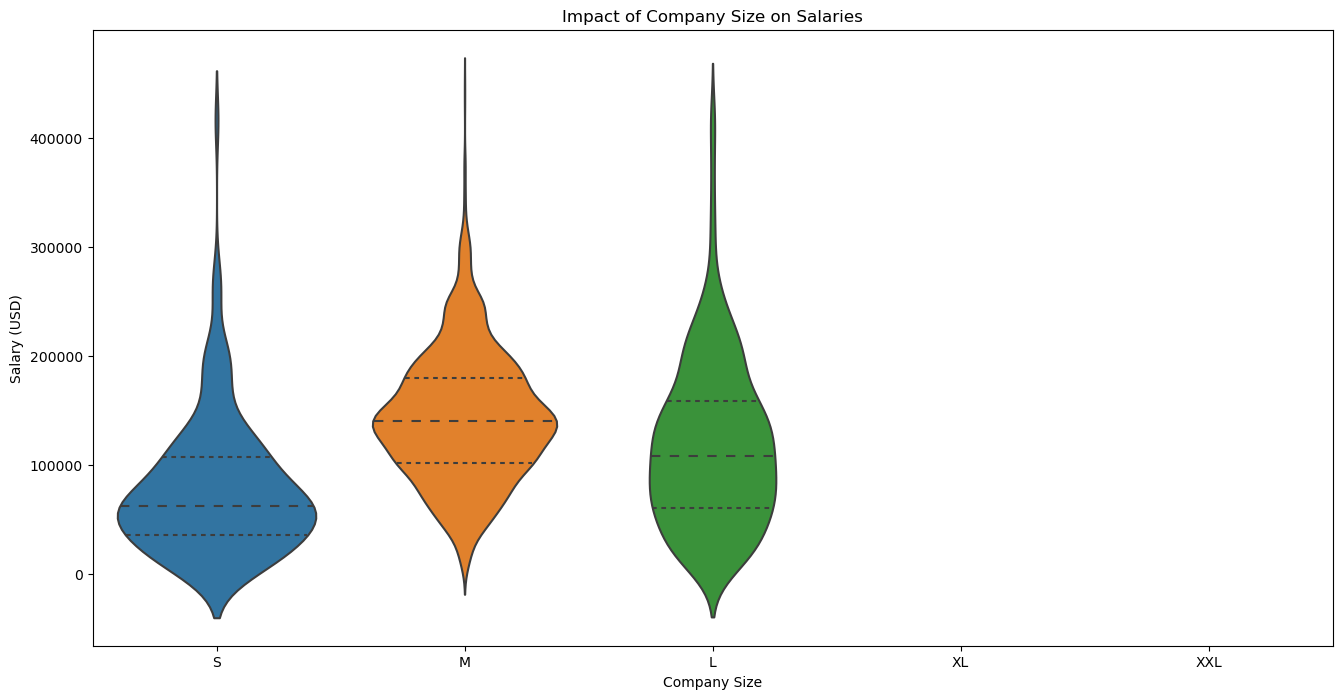

In [14]:
# Explore the impact of company size on salaries using violin plots
plt.figure(figsize=(16, 8))
sns.violinplot(x='company_size', y='salary_in_usd', data=df, order=['S', 'M', 'L', 'XL', 'XXL'], inner='quartile')
plt.title('Impact of Company Size on Salaries')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.show()


### Explore yearly trends in salaries

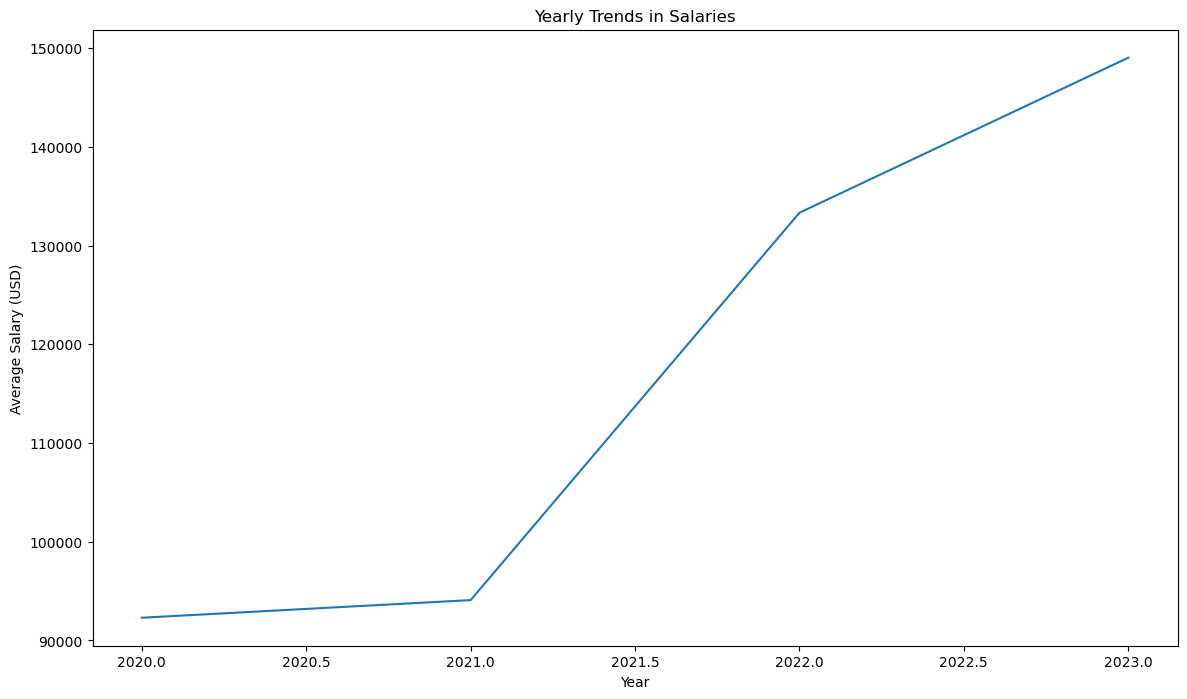

In [15]:
# Explore yearly trends in salaries
plt.figure(figsize=(14, 8))
sns.lineplot(x='work_year', y='salary_in_usd', data=df, errorbar=None)
plt.title('Yearly Trends in Salaries')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.show()


### Count Plot for Experience Levels

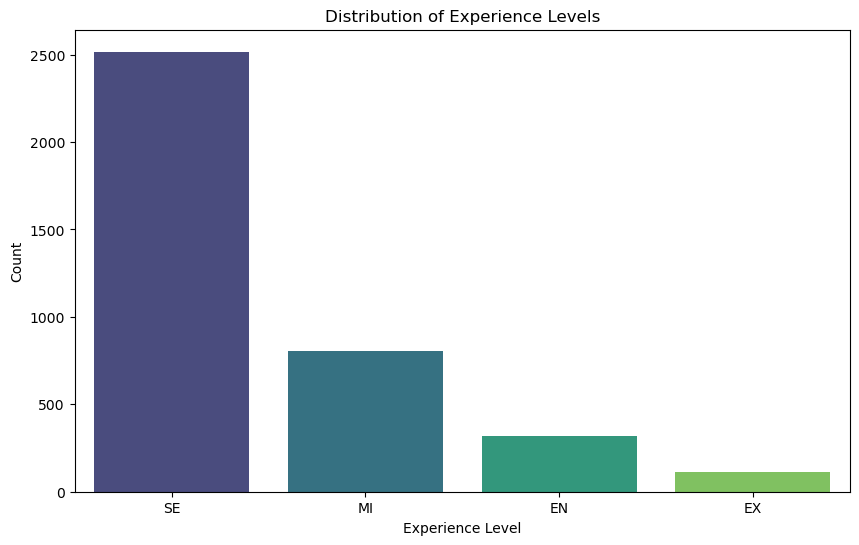

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='experience_level', data=df, palette='viridis')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()


### Bar Chart for Employment Types

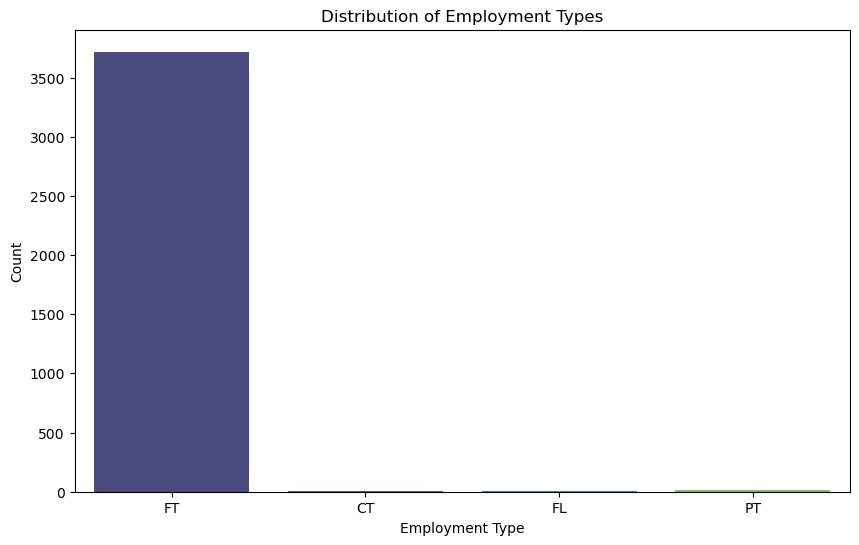

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_type', data=df, palette='viridis')
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()
